# Exploratory Analysis

In [1]:
# remove after testing
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlopen
from sklearn.decomposition import PCA
from mclearn.viz import (plot_class_distribution,
                         plot_hex_map,
                         plot_filters_and_spectrum,
                         plot_scatter_with_classes)
from mclearn.preprocessing import balanced_train_test_split
%matplotlib inline
sns.set_style('ticks')

In [3]:
fig_dir = '../thesis/figures/'
target_col = 'class'
sdss_features = ['psfMag_r_w14', 'psf_u_g_w14', 'psf_g_r_w14', 'psf_r_i_w14',
                'psf_i_z_w14', 'petroMag_r_w14', 'petro_u_g_w14', 'petro_g_r_w14',
                'petro_r_i_w14', 'petro_i_z_w14', 'petroRad_r']
vstatlas_features = ['rmagC', 'umg', 'gmr', 'rmi', 'imz', 'rmw1', 'w1m2']

In [4]:
sdss = pd.read_hdf('../data/sdss.h5', 'sdss')
vstatlas = pd.read_hdf('../data/vstatlas.h5', 'vstatlas')

## Distribution of Classes

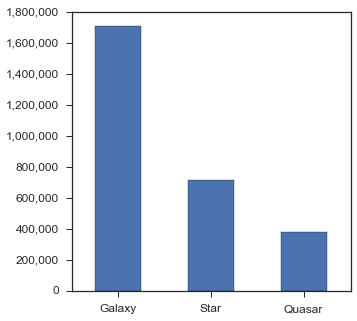

In [10]:
fig = plt.figure(figsize=(5, 5))
ax = plot_class_distribution(sdss[target_col])
ax.tick_params(top='off', right='off')
fig.savefig(fig_dir + '2_astro/sdss_class_distribution.pdf', bbox_inches='tight')

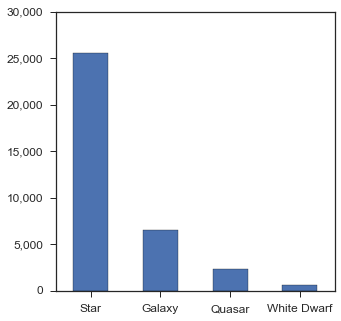

In [11]:
fig = plt.figure(figsize=(5, 5))
ax = plot_class_distribution(vstatlas[target_col])
ax.tick_params(top='off', right='off')
fig.savefig(fig_dir + '2_astro/vstatlas_class_distribution.pdf', bbox_inches='tight')

In [4]:
sdss[target_col].value_counts()

Galaxy    1707233
Star       714313
Quasar     379456
dtype: int64

In [6]:
vstatlas[target_col].value_counts()

Star           25604
Galaxy          6559
Quasar          2303
White Dwarf      590
dtype: int64

## Maps of Classes

We have around 2.8 million labelled data points. Below are the maps showing how the three classes - galaxies, stars, and quasars - are distributed. Here we use the Mollweide projection, with the following coordinate layout. The red line is the plane of the Milky Way.

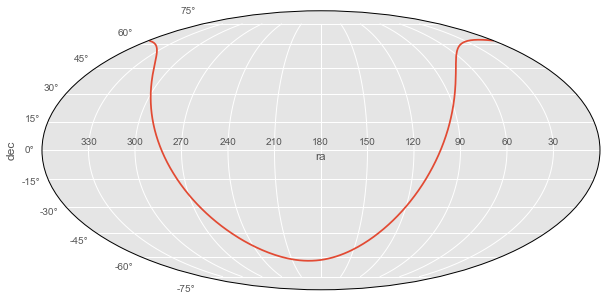

In [5]:
fig = plt.figure(figsize=(10,5))
zero_values = np.zeros(1)
ax = plot_hex_map(zero_values, zero_values, axisbg=None, colorbar=False, labels=True)
fig.savefig(fig_dir + '2_astro/mollweide_map.pdf', bbox_inches='tight')

Here are the distribution map of galaxies, stars, and quasars, respectively.

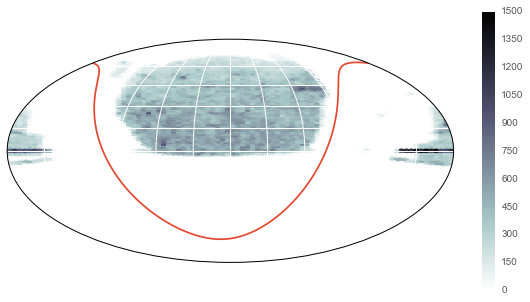

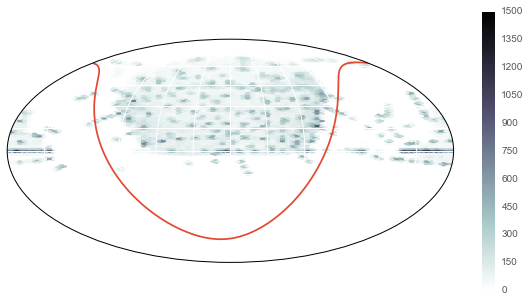

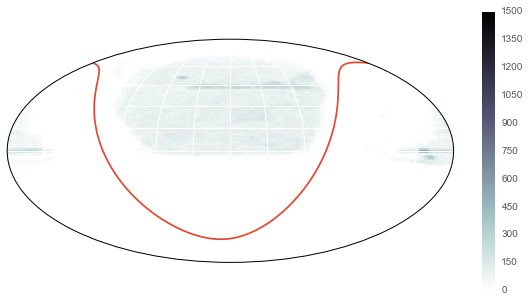

In [7]:
# make Boolean index of each object
is_galaxy = sdss[target_col] == 'Galaxy'
is_star = sdss[target_col] == 'Star'
is_quasar = sdss[target_col] == 'Quasar'

# extract the coordinates of each object
galaxy_ra, galaxy_dec = sdss[is_galaxy]['ra'], sdss[is_galaxy]['dec']
star_ra, star_dec = sdss[is_star]['ra'], sdss[is_star]['dec']
quasar_ra, quasar_dec = sdss[is_quasar]['ra'], sdss[is_quasar]['dec']

# plot galaxy map
fig = plt.figure(figsize=(10,5))
ax = plot_hex_map(galaxy_ra, galaxy_dec)
fig.savefig(fig_dir + '4_expt1/sdss_train_galaxies.png', bbox_inches='tight', dpi=300)

# plot star map
fig = plt.figure(figsize=(10,5))
ax = plot_hex_map(star_ra, star_dec)
fig.savefig(fig_dir + '4_expt1/sdss_train_stars.png', bbox_inches='tight', dpi=300)

# plot quasar map
fig = plt.figure(figsize=(10,5))
ax = plot_hex_map(quasar_ra, quasar_dec)
fig.savefig(fig_dir + '4_expt1/sdss_train_quasars.png', bbox_inches='tight', dpi=300)

## Photometry vs Spectroscopy

To see the difference between photometry and spectroscopy, we plot the spectrum of Vega (which gives us a lot of information but this is expensive to obtain) and the 5 ugriz photometric filters.

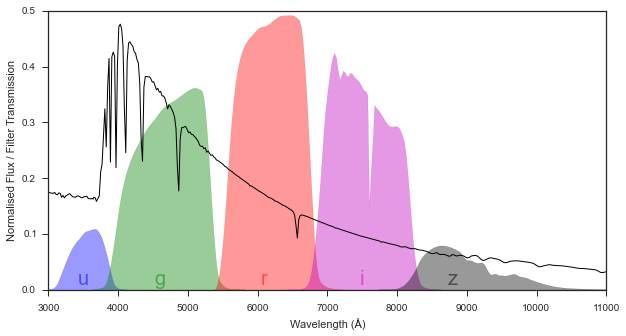

In [9]:
vega_url = 'http://www.astro.washington.edu/users/ivezic/DMbook/data/1732526_nic_002.ascii'
ugriz_filter_url = 'http://www.sdss.org/dr7/instruments/imager/filters/%s.dat'
filter_dir = '../data/filters'
spectra_dir = '../data/spectra'

fig = plt.figure(figsize=(10,5))
ax = plot_filters_and_spectrum(ugriz_filter_url, vega_url, filter_dir=filter_dir, spectra_dir=spectra_dir)
fig.savefig(fig_dir + '2_astro/vega_filters_and_spectrum.pdf', bbox_inches='tight')

## PCA and Dimensionality Reduction

We reduce the 11 dimensions down to 2 dimensions using PCA.

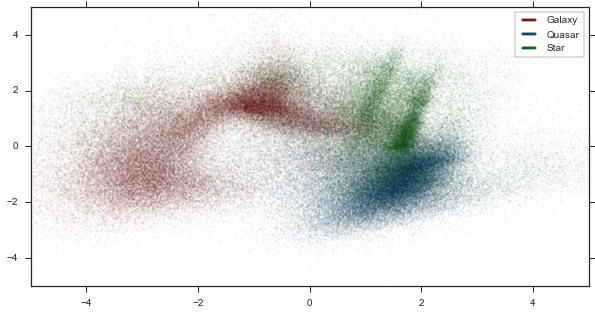

In [10]:
X_train, X_test, y_train, y_test = balanced_train_test_split(
        sdss[sdss_features], sdss[target_col], train_size=200000, test_size=100000, random_state=2)

pca = PCA(n_components=2)
projection = pca.fit_transform(X_train)
classes = ['Galaxy', 'Quasar', 'Star']

fig = plt.figure(figsize=(10, 5))
ax = plot_scatter_with_classes(projection, y_train, classes)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
fig.savefig(fig_dir + '4_expt1/sdss_pca_all.png', bbox_inches='tight', dpi=300)